<a href="https://colab.research.google.com/github/Arnav-Ajay/Adjacency-Relationships/blob/main/adjacency_relationships.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective:

Write a simple Python script to calculate adjacency relationships between polygons using a given set of coordinates.

Task:
1.	You will be given a set of polygons (as a list of coordinate tuples).
2.	Your script should determine which polygons are adjacent (i.e., share at least one edge).

Requirements:

•	Use Shapely to check if two polygons share an edge.

•	Output the adjacency dictionary.

•	Keep the solution efficient and readable.
________________________________________
Submission:

•	Submit your Python script via a GitHub Gist or Pastebin link.

•	Briefly explain your approach in 2-3 sentences.

This task helps us evaluate your basic understanding of Python, geospatial processing, and structured problem-solving. 🚀



In [7]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import numpy as np
import math

In [5]:
def plot_polygons(polygons):
  # Plot Setup
  fig, ax = plt.subplots(figsize=(6,6))
  ax.set_xlim(-1, 7)
  ax.set_ylim(-1, 7)
  ax.set_xticks(np.arange(-1, 6, 1))
  ax.set_yticks(np.arange(-1, 6, 1))
  ax.grid(True, linestyle='--', alpha=0.6)

  # Draw and Label Polygons
  for name, coords in polygons.items():
    poly = Polygon(coords)  # Create polygon
    x, y = poly.exterior.xy  # Get x, y coordinates

    ax.fill(x, y, alpha=0.4, edgecolor='black', linewidth=2)  # Fill polygon
    centroid = poly.centroid  # Get centroid for labeling
    ax.text(centroid.x, centroid.y, name, fontsize=12, ha='center', va='center',
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

  # Display the plot
  plt.title("Polygon Visualization")
  plt.xlabel("X-axis")
  plt.ylabel("Y-axis")
  plt.show()

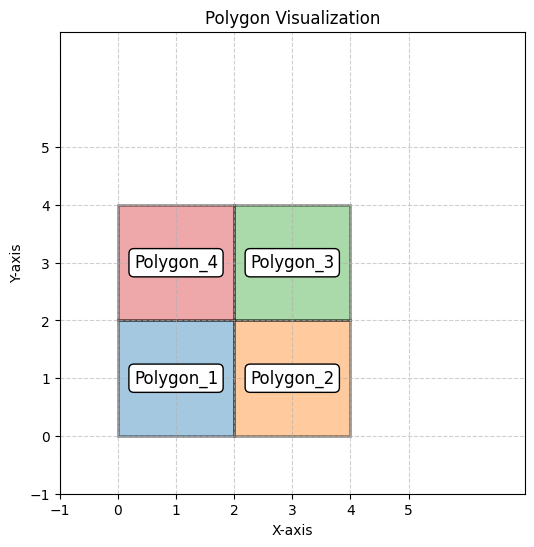

Output
 {'Polygon_1': ['Polygon_4', 'Polygon_2', 'Polygon_3'], 'Polygon_2': ['Polygon_1', 'Polygon_4', 'Polygon_3'], 'Polygon_3': ['Polygon_1', 'Polygon_4', 'Polygon_2'], 'Polygon_4': ['Polygon_1', 'Polygon_2', 'Polygon_3']}


In [26]:
# Input
polygons = {
    "Polygon_1": [(0,0), (2,0), (2,2), (0,2)],
    "Polygon_2": [(2,0), (4,0), (4,2), (2,2)],
    "Polygon_3": [(2,2), (4,2), (4,4), (2,4)],
    "Polygon_4": [(0,2), (2,2), (2,4), (0,4)]
}

plot_polygons(polygons)

# Using grid hashing to optimize the complexity
GRID_SIZE = 2  # Size of the grid cell (adjust for better results)

# Function to get grid cell from a polygon's bounding box
def get_grid_cell(polygon, grid_size=GRID_SIZE):
    minx, miny, maxx, maxy = polygon.bounds
    return (math.floor(minx / grid_size), math.floor(miny / grid_size))

# Converting to Shapely Polygon objects
polygon_objects = {name: Polygon(coords) for name, coords in polygons.items()}

# Create adjacency dictionary
adjacency_dict = {name: [] for name in polygons}

# Hash polygons into the grid based on their bounding boxes
grid = {}

for name, poly in polygon_objects.items():
    grid_cell = get_grid_cell(poly)
    if grid_cell not in grid:
        grid[grid_cell] = []
    grid[grid_cell].append((name, poly))

# Check adjacency within each grid cell and its neighbors
for grid_cell, polygons_in_cell in grid.items():
    # Get neighboring grid cells (including current cell)
    neighbors = [
        (grid_cell[0] + dx, grid_cell[1] + dy)
        for dx in range(-1, 2)
        for dy in range(-1, 2)
    ]

    for neighbor_cell in neighbors:
        if neighbor_cell in grid:
            for name1, poly1 in polygons_in_cell:
                for name2, poly2 in grid[neighbor_cell]:
                    if name1 != name2 and poly1.touches(poly2):
                        adjacency_dict[name1].append(name2)

# Print adjacency dictionary
print("Output\n", adjacency_dict)

In [9]:
# Case 1
polygons_1 = {
    "Polygon_1": [(0,0), (2,0), (2,2), (0,2)],
    "Polygon_2": [(2,0), (4,0), (4,2), (2,2)],
    "Polygon_3": [(2,2), (4,2), (4,4), (2,4)],
    "Polygon_4": [(0,2), (2,2), (2,4), (0,4)]
}

# Output
# {
#     "Polygon_1": ["Polygon_2", "Polygon_4"],
#     "Polygon_2": ["Polygon_1", "Polygon_3"],
#     "Polygon_3": ["Polygon_2"],
#     "Polygon_4": ["Polygon_1"]
# }


# Case 2
polygons_2 = {
    "Polygon_1": [(0,0), (2,0), (2,2), (0,2)],
    "Polygon_2": [(5,0), (7,0), (7,2), (5,2)],
    "Polygon_3": [(0,3), (2,3), (2,5), (0,5)],
    "Polygon_4": [(3,0), (5,0), (5,2), (3,2)]
}
# Output
# {
#     "Polygon_1": [],
#     "Polygon_2": [],
#     "Polygon_3": [],
#     "Polygon_4": []
# }


# Case 3
polygons_3 = {
    "Polygon_1": [(0,0), (4,0), (4,4), (0,4)],  # Outer square
    "Polygon_2": [(1,1), (3,1), (3,3), (1,3)]   # Inner square
}
# Output
# {
#     "Polygon_1": [],
#     "Polygon_2": []
# }


# Case 4
polygons_4 = {
    "Polygon_1": [(0,0), (2,0), (2,2), (0,2)],
    "Polygon_2": [(2,0), (4,0), (4,2), (2,2)],
    "Polygon_3": [(0,2), (2,2), (2,4), (0,4)],
    "Polygon_4": [(2,2), (4,2), (4,4), (2,4)]
}
# Output
# {
#     "Polygon_1": ["Polygon_2", "Polygon_3"],
#     "Polygon_2": ["Polygon_1", "Polygon_4"],
#     "Polygon_3": ["Polygon_1"],
#     "Polygon_4": ["Polygon_2"]
# }


# Case 5
polygons_5 = {
    "Polygon_1": [(0,0), (3,0), (3,3), (0,3)],
    "Polygon_2": [(3,0), (6,0), (6,3), (3,3)],
    "Polygon_3": [(0,3), (3,3), (3,6), (0,6)],
    "Polygon_4": [(3,3), (6,3), (6,6), (3,6)],
    "Polygon_5": [(0,0), (1,0), (1,1), (0,1)]
}

# Output

# {
#     "Polygon_1": ["Polygon_2", "Polygon_5"],
#     "Polygon_2": ["Polygon_1", "Polygon_4"],
#     "Polygon_3": ["Polygon_4"],
#     "Polygon_4": ["Polygon_2", "Polygon_3"],
#     "Polygon_5": ["Polygon_1"]
# }
